# Import the necessary libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

 # Read the DataFrames from CSV files

In [5]:
reddit_data = pd.read_csv('Reddit_Data.csv')
twitter_data = pd.read_csv('Twitter_Data.csv')

# DataFrames Information

In [6]:
reddit_data

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [7]:
twitter_data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [8]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [9]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [10]:
#renaming the columns
twitter_data.columns=['messages','labels']
reddit_data.columns=['messages','labels']

In [11]:
twitter_data.head()

,messages,labels
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [12]:
reddit_data.head()

,messages,labels
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


# Merge DataFrames

In [13]:
data = pd.concat([twitter_data, reddit_data], ignore_index = True)

In [14]:
data

,messages,labels
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
200224,jesus,0.0
200225,kya bhai pure saal chutiya banaya modi aur jab...,1.0
200226,downvote karna tha par upvote hogaya,0.0
200227,haha nice,1.0


In [15]:
data.tail()

,messages,labels
200224,jesus,0.0
200225,kya bhai pure saal chutiya banaya modi aur jab...,1.0
200226,downvote karna tha par upvote hogaya,0.0
200227,haha nice,1.0
200228,facebook itself now working bjp’ cell,0.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200229 entries, 0 to 200228
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   messages  200125 non-null  object 
 1   labels    200222 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


 # Handling Missing Values

In [17]:
data.isnull().sum()

,0
messages,104
labels,7


In [18]:
data = data.dropna()

In [19]:
data.head()

,messages,labels
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [20]:
data.tail()

,messages,labels
200224,jesus,0.0
200225,kya bhai pure saal chutiya banaya modi aur jab...,1.0
200226,downvote karna tha par upvote hogaya,0.0
200227,haha nice,1.0
200228,facebook itself now working bjp’ cell,0.0


# Data Preprocessing

In [21]:
#Libraries of NLTK
import re,string,nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [22]:
import nltk
nltk.download('wordnet') # Downloading the wordnet dataset
nltk.download('stopwords')

import re,string,nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer,WordNetLemmatizer
#cleaning the data from unnecessary data

#replacing url with string URL
def replace_url(text):
    return re.sub('https?:\/\/\S*|www\.\S+','URL',text)

#removing html
def remove_html(text):
    return re.sub('<.*?>','',text)

#replacing mentions with string user
def replace_mentions(text):
    return re.sub('@\S*','user',text,flags=re.IGNORECASE)

#replacing numbers with string number
def replace_num(text):
    return re.sub('^[+-]*?\d{1,3}[- ]*?\d{1,10}|\d{10}','NUMBER',text)

#replacing <3 with sring heart
def replace_heart(text):
    return re.sub('<3','HEART', text)

#removing alphanumeric characters eg-XYZ123ABC
def remove_alphanumeric(text):
    return re.sub('\w*\d+\w*','',text)

#removing all english stopwords
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

#removing punctuations
def remove_punctuations(text):
    text=''.join([word for word in text if word not in string.punctuation])
    return text

#reducing words to thier root form
def lemmatization(text):
    lm= WordNetLemmatizer()
    text = ' '.join([lm.lemmatize(word, pos='v') for word in text.split()])
    return text

def clean_text(text):
    text=str(text).lower()
    text = replace_url(text)
    text = remove_html(text)
    text = replace_mentions(text)
    text = replace_num(text)
    text = replace_heart(text)
    text = remove_alphanumeric(text)
    text = remove_stopwords(text)
    text=remove_punctuations(text)
    #text=stemming(text)
    text=lemmatization(text)
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
data['messages1']=data['messages'].apply(clean_text)

<ipython-input-23-8b0a0f9e43ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages1']=data['messages'].apply(clean_text)


In [24]:
data['messages1']

,messages1
0,modi promise “minimum government maximum gover...
1,talk nonsense continue drama vote modi
2,say vote modi welcome bjp tell rahul main camp...
3,ask supporters prefix chowkidar name modi grea...
4,answer among powerful world leader today trump...
...,...
200224,jesus
200225,kya bhai pure saal chutiya banaya modi aur jab...
200226,downvote karna tha par upvote hogaya
200227,haha nice


# Sentiment Analysis

In [25]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    # Get sentiment scores using VADER
    scores = sid.polarity_scores(text)
    # Extract compound score, which represents overall sentiment
    compound_score = scores['compound']
    # Return compound score
    return compound_score

# Apply sentiment analysis to the cleaned text data
data['sentiment_score'] = data['messages1'].apply(get_sentiment_scores)


<ipython-input-26-28a27091f096>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment_score'] = data['messages1'].apply(get_sentiment_scores)


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200118 entries, 0 to 200228
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   messages         200118 non-null  object 
 1   labels           200118 non-null  float64
 2   messages1        200118 non-null  object 
 3   sentiment_score  200118 non-null  float64
dtypes: float64(2), object(2)
memory usage: 7.6+ MB


In [28]:
data.drop('messages', axis=1, inplace=True)

<ipython-input-28-27544148e1fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('messages', axis=1, inplace=True)


In [29]:
data.head()

,labels,messages1,sentiment_score
0,-1.0,modi promise “minimum government maximum gover...,0.4939
1,0.0,talk nonsense continue drama vote modi,-0.4019
2,1.0,say vote modi welcome bjp tell rahul main camp...,0.7096
3,1.0,ask supporters prefix chowkidar name modi grea...,0.4939
4,1.0,answer among powerful world leader today trump...,0.4215


# EDA & Data Visualisation

<Axes: xlabel='labels'>

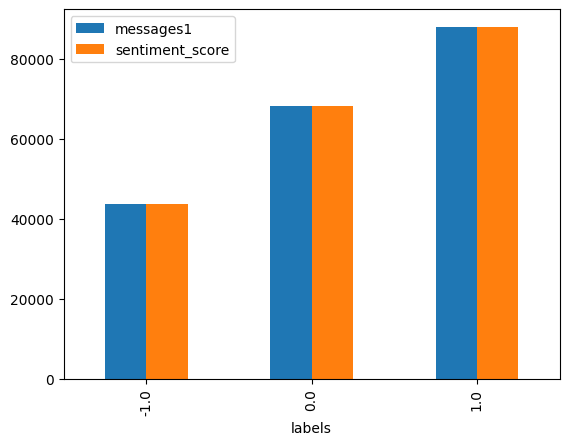

In [30]:
# The distribution of sentiments
data.groupby('labels').count().plot(kind='bar')

In [31]:
data['label'] = data['labels'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})

<ipython-input-31-95b0dc3750cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['labels'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})


<ipython-input-32-8e689c2e3494>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data.messages1.str.split().apply(len)


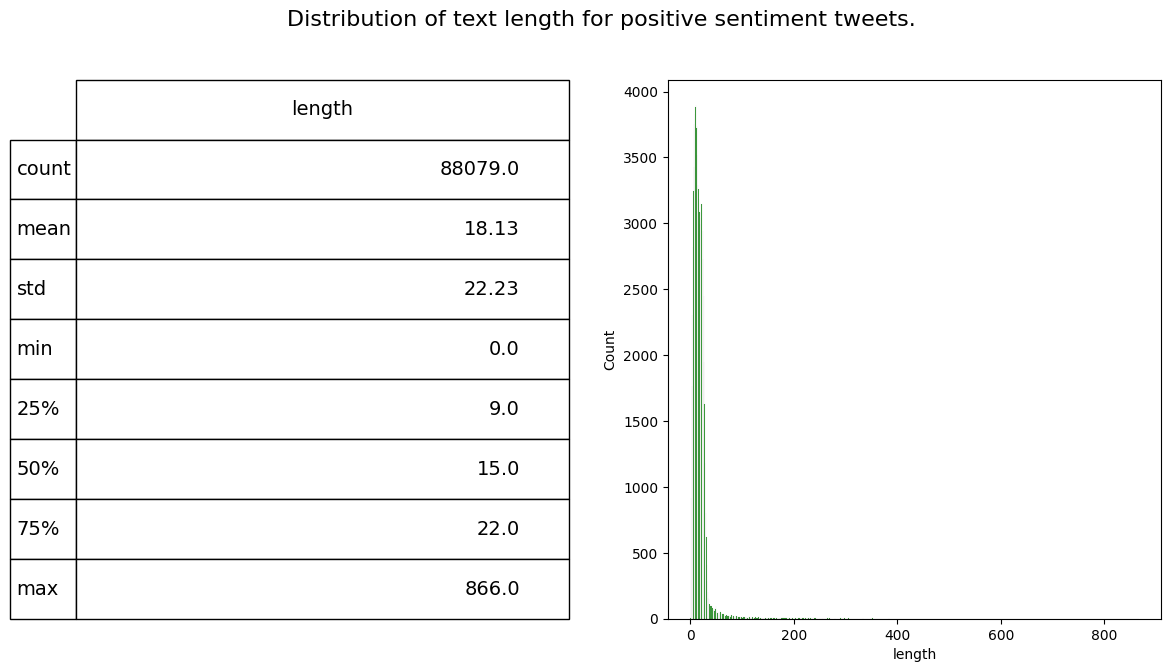

In [32]:
#Plotting the distribution of text length for positive sentiment Data
fig = plt.figure(figsize=(14,7))
data['length'] = data.messages1.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']=='Positive']['length'], ax=ax1,color='green')
describe = data.length[data.label=='Positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

<ipython-input-33-385563b7302c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data.messages1.str.split().apply(len)


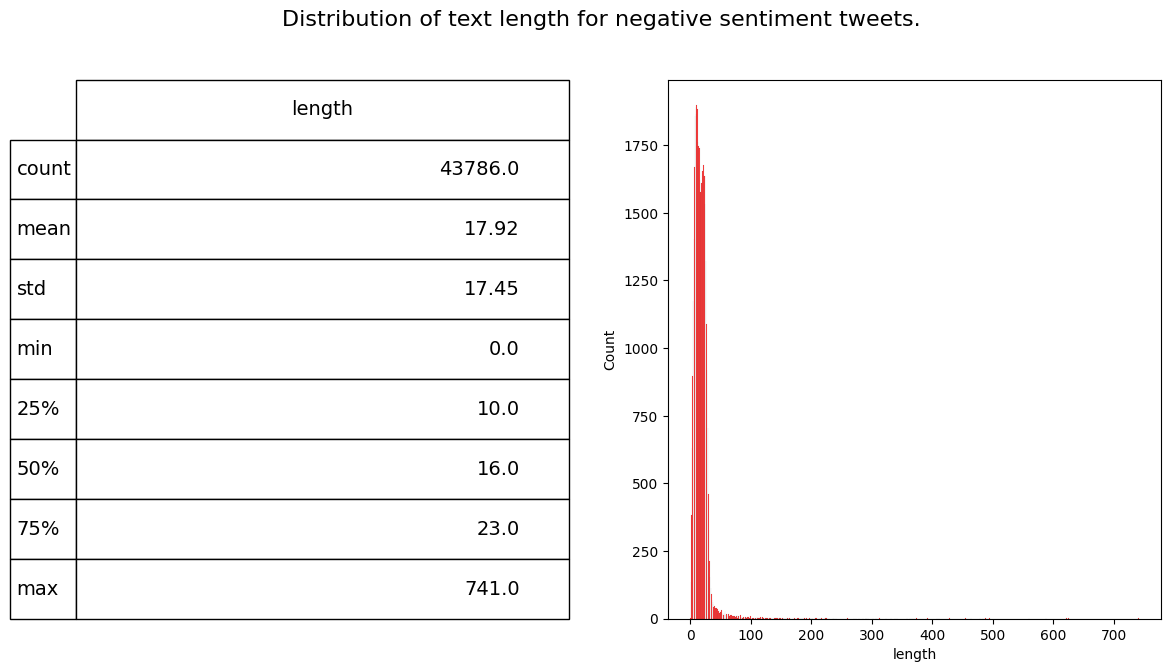

In [33]:
#Plotting the distribution of text length for Negative sentiment Data
fig = plt.figure(figsize=(14,7))
data['length'] = data.messages1.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']=='Negative']['length'], ax=ax1,color='red')
describe = data.length[data.label=='Negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for negative sentiment tweets.', fontsize=16)

plt.show()

<ipython-input-34-95943ceffadd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data.messages1.str.split().apply(len)


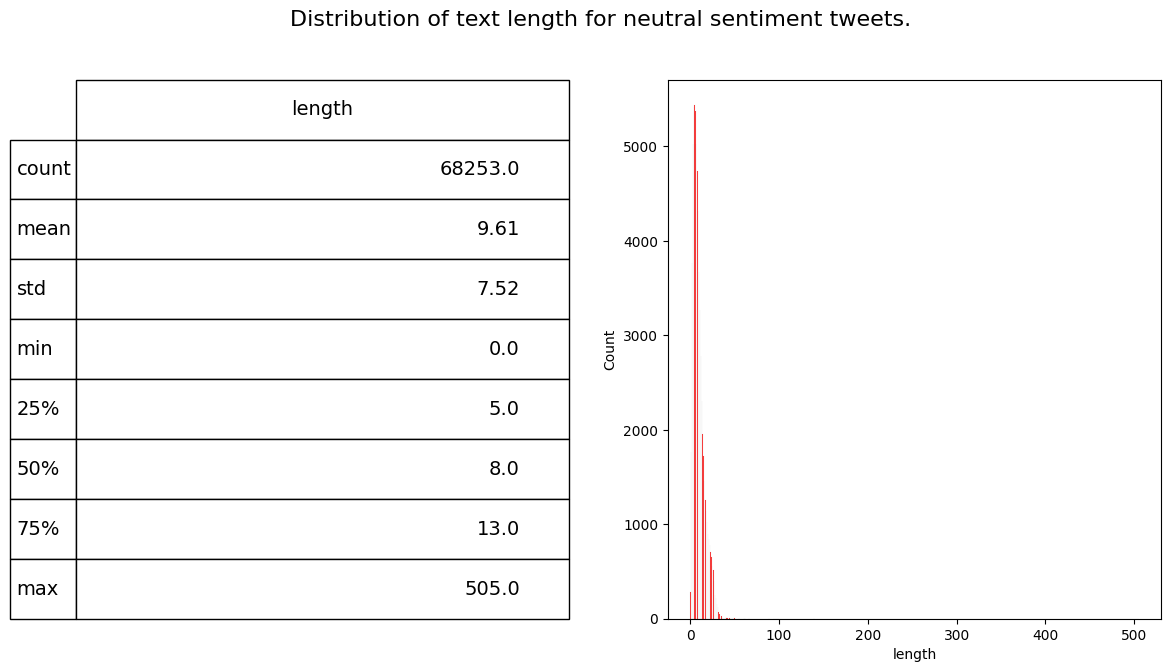

In [34]:
#Plotting the distribution of text length for Neutral sentiment Data
fig = plt.figure(figsize=(14,7))
data['length'] = data.messages1.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']=='Neutral']['length'], ax=ax1,color='red')
describe = data.length[data.label=='Neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for neutral sentiment tweets.', fontsize=16)

plt.show()

In [35]:
import plotly.express as px
fig = px.pie(data, names='label', title ='Pie chart of different sentiments of data')
fig.show()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200118 entries, 0 to 200228
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   labels           200118 non-null  float64
 1   messages1        200118 non-null  object 
 2   sentiment_score  200118 non-null  float64
 3   label            200118 non-null  object 
 4   length           200118 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 9.2+ MB


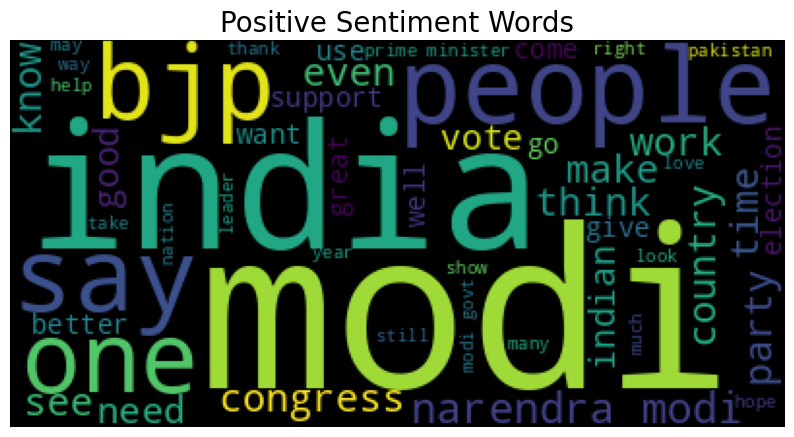

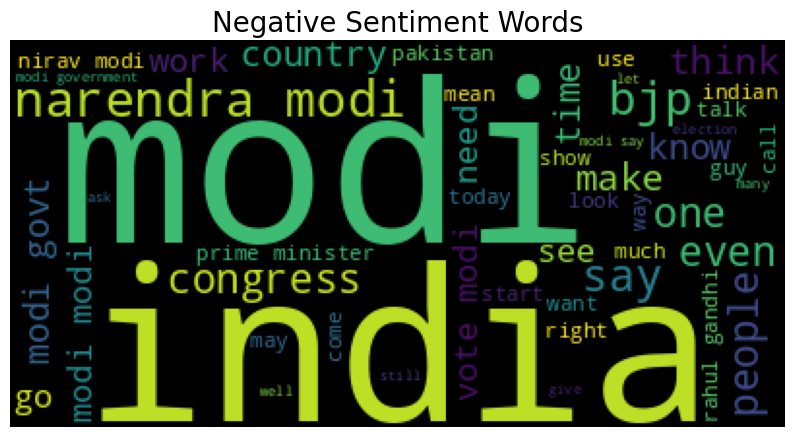

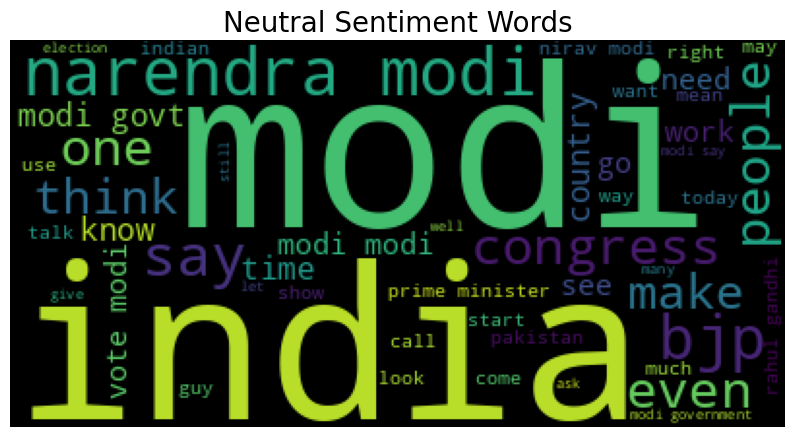

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def wordcount_gen(df, category, sentiment_column='sentiment_score'):
              """
              Generating Word Cloud

              Inputs:
                - df: DataFrame containing the data
                - category: Positive/Negative/Neutral
                - sentiment_column (optional): Name of the column containing sentiment score (default: 'sentiment_score')
              """

              # Filter data based on sentiment
              filtered_data = df[df[sentiment_column] > 0.5] if category == 'Positive' else df[df[sentiment_column] <= 0.5]

              # Combine all messages from the filtered data
              combined_tweets = " ".join(filtered_data['messages1'])

              # Initialize wordcloud object
              wc = WordCloud(background_color='black',
                              max_words=50,
                              stopwords=STOPWORDS)

              # Generate and plot wordcloud
              plt.figure(figsize=(10, 10))
              plt.imshow(wc.generate(combined_tweets))
              plt.title('{} Sentiment Words'.format(category), fontsize=20)
              plt.axis('off')
              plt.show()
#Positive tweet words
wordcount_gen(data, 'Positive')

# Negative tweet words
wordcount_gen(data, 'Negative')

# Neutral tweet words (assuming sentiment_column < 0.5 is neutral)
wordcount_gen(data, 'Neutral')



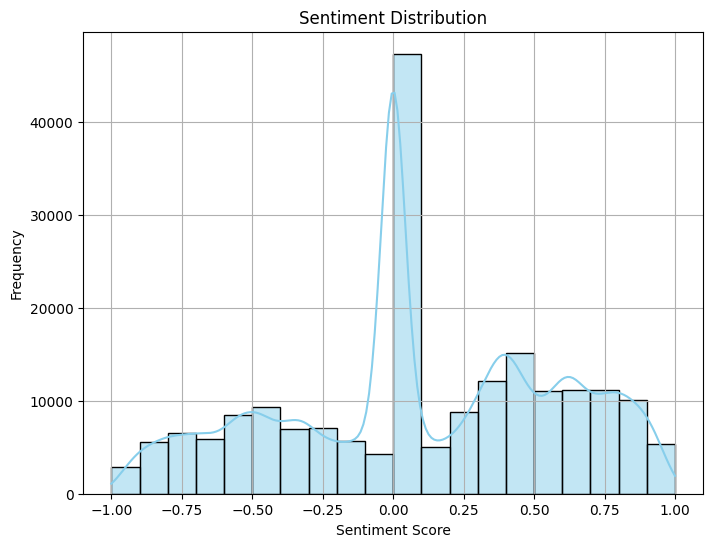

In [38]:
# Visualize sentiment distribution using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['sentiment_score'], bins=20, kde=True, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-39-f76c39074626>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




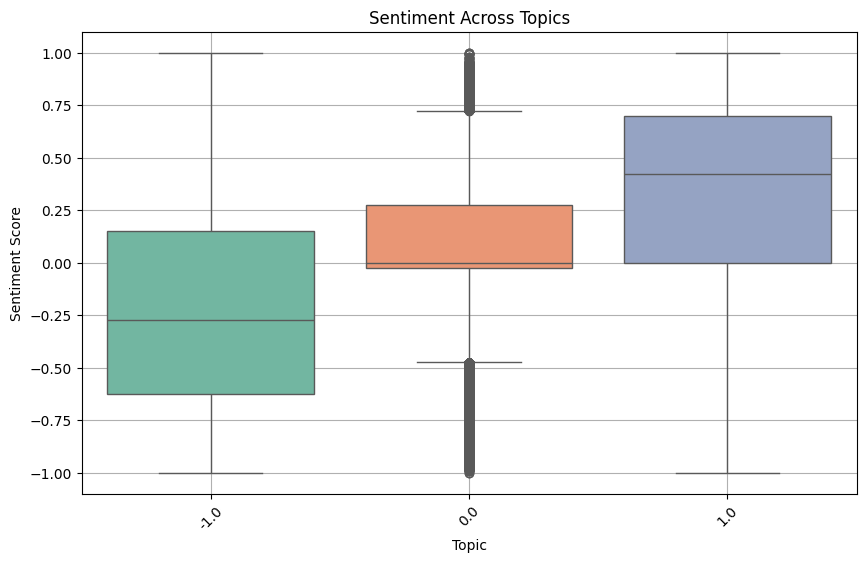

In [39]:
# Compare sentiment across labels
plt.figure(figsize=(10, 6))
sns.boxplot(x='labels', y='sentiment_score', data=data, palette='Set2')
plt.title('Sentiment Across Topics')
plt.xlabel('Topic')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

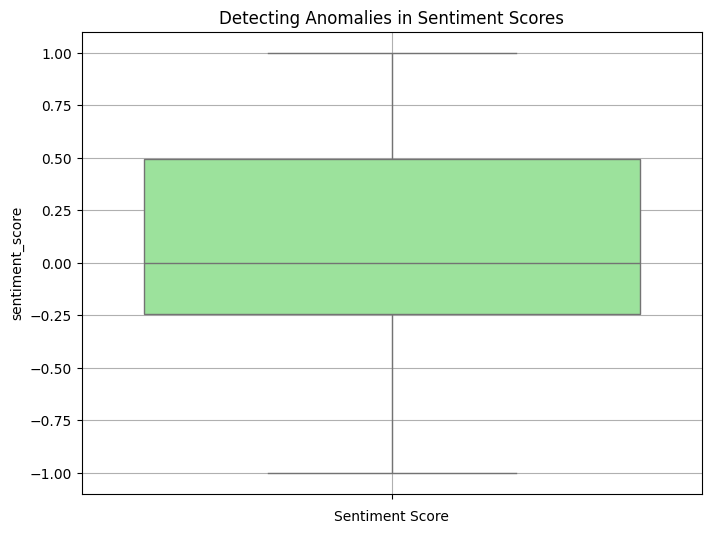

In [40]:
# Detect anomalies or outliers in sentiment scores
plt.figure(figsize=(8, 6))
sns.boxplot(data['sentiment_score'], color='lightgreen')
plt.title('Detecting Anomalies in Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.grid(True)
plt.show()

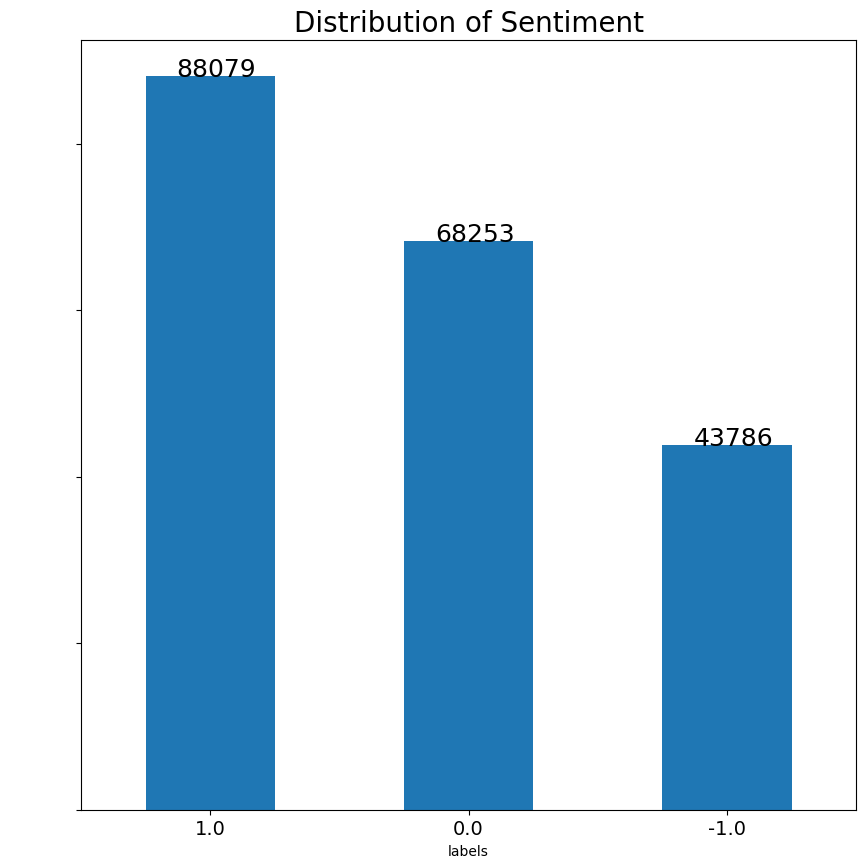

In [41]:
#Graph of Stopwords
fig , ax = plt.subplots(figsize = (10,10))
ax = data['labels'].value_counts().plot(kind = 'bar')

plt.xticks(rotation = 0, size = 14)
plt.yticks(size = 14, color = 'white')
plt.title('Distribution of Sentiment', size = 20)

ax.annotate(text = data['labels'].value_counts().values[0], xy = (-0.13,88079), size = 18)
ax.annotate(text = data['labels'].value_counts().values[1], xy = (0.87,68253), size = 18)
ax.annotate(text = data['labels'].value_counts().values[2], xy = (1.87,43786), size = 18)

plt.show()

# Train & Test Split

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200118 entries, 0 to 200228
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   labels           200118 non-null  float64
 1   messages1        200118 non-null  object 
 2   sentiment_score  200118 non-null  float64
 3   label            200118 non-null  object 
 4   length           200118 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 9.2+ MB


In [44]:
#Finding X and y
X = data['messages1']
y = data['labels']


In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)


In [46]:
##Vectorize text data
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Support Vector Classifier

In [47]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# If GPU is available, set it as the device
if tf.config.list_physical_devices('GPU'):
  with tf.device('/GPU:0'): # Or '/GPU:1' etc. if you have multiple GPUs
    # Initialize and train the SVM model
    svm_model = LinearSVC()
    svm_model.fit(X_train_tfidf, y_train)

    # Make predictions on the test set
    svm_predictions = svm_model.predict(X_test_tfidf)

    # Evaluate the model
    svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
    print("SVM F1 Score:", svm_f1)

    svm_accuracy = accuracy_score(y_test,svm_predictions)
    print("SVM Accuracy Score:", svm_accuracy)

    print(classification_report(y_test, svm_predictions))

else:
  print("No GPU found, training on CPU")
  svm_model = LinearSVC()
  svm_model.fit(X_train_tfidf, y_train)

  # Make predictions on the test set
  svm_predictions = svm_model.predict(X_test_tfidf)

  # Evaluate the model
  svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
  print("SVM F1 Score:", svm_f1)

  svm_accuracy = accuracy_score(y_test,svm_predictions)
  print("SVM Accuracy Score:", svm_accuracy)

  print(classification_report(y_test, svm_predictions))


Num GPUs Available:  0
No GPU found, training on CPU
SVM F1 Score: 0.8718664793429985
SVM Accuracy Score: 0.8728013192084749
              precision    recall  f1-score   support

        -1.0       0.85      0.77      0.81      8861
         0.0       0.85      0.94      0.89     13650
         1.0       0.90      0.87      0.89     17513

    accuracy                           0.87     40024
   macro avg       0.87      0.86      0.86     40024
weighted avg       0.87      0.87      0.87     40024



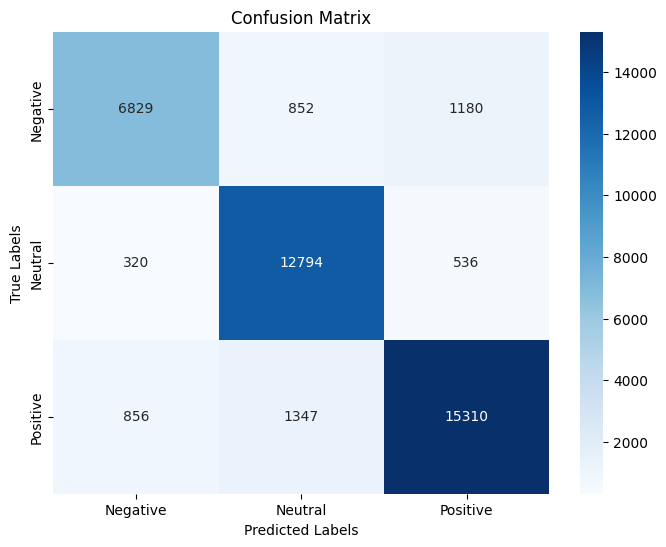

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'svm_predictions' and 'y_test' are already defined from your previous code

# Create the confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# PCA/LDA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Scale the data before applying PCA
scaler = StandardScaler(with_mean=False) # Use with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

# Apply PCA with a smaller number of components
n_components = min(100, X_train_scaled.shape[1]) # Choose a reasonable number of components, or experiment with different values. Limit it to 100 or the number of features if it's less than 100
pca = PCA(n_components=n_components, random_state=42) # Set a random_state for reproducibility
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Now train your model using X_train_pca and X_test_pca instead of X_train_tfidf and X_test_tfidf

# Example using LinearSVC
svm_model = LinearSVC(random_state=42)  # Added random_state for reproducibility
svm_model.fit(X_train_pca, y_train)
svm_predictions = svm_model.predict(X_test_pca)

# Evaluate
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
print("SVM F1 Score (with PCA):", svm_f1)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy Score (with PCA):", svm_accuracy)

print(classification_report(y_test, svm_predictions))


SVM F1 Score (with PCA): 0.27140674764182726
SVM Accuracy Score (with PCA): 0.43796222266640017
              precision    recall  f1-score   support

        -1.0       0.30      0.00      0.00      8861
         0.0       0.47      0.01      0.01     13650
         1.0       0.44      0.99      0.61     17513

    accuracy                           0.44     40024
   macro avg       0.40      0.33      0.21     40024
weighted avg       0.42      0.44      0.27     40024



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



# RNN


In [50]:
import torch.nn as nn
class MyRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim=128, hidden_size=256, num_layers=2, num_classes=10):
        super().__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

        self.rnn1 = self._make_rnn_block(embedding_dim, hidden_size, num_layers)
        self.rnn2 = self._make_rnn_block(hidden_size, hidden_size, num_layers)
        self.rnn3 = self._make_rnn_block(hidden_size, hidden_size, num_layers)

        self.fc1 = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(hidden_size, 128),
            nn.ReLU()
        )

        self.fc2 = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(128, 64),
            nn.ReLU()
        )

        self.fc3 = nn.Linear(64, num_classes)

    def _make_rnn_block(self, input_size, hidden_size, num_layers):
        return nn.RNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=0.3)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn1(x)
        x, _ = self.rnn2(x)
        x, _ = self.rnn3(x)
        x = x[:, -1, :]
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

# Multi-Layer Perceptron Classifier

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize MLPClassifier model
mlp_model = MLPClassifier()

# Train the MLPClassifier model on the training data
mlp_model.fit(X_train_tfidf, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning:

Training interrupted by user.



MLPClassifier()

In [55]:
# Predict on the testing data
y_pred_mlp = mlp_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLPClassifier Accuracy:", accuracy_mlp)

MLPClassifier Accuracy: 0.8427443533879673


In [56]:
# Generate confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("MLPClassifier Confusion Matrix:")
print(conf_matrix_mlp)

# Generate classification report
report_mlp = classification_report(y_test, y_pred_mlp)
print("MLPClassifier Classification Report:")
print(report_mlp)

MLPClassifier Confusion Matrix:
[[ 6605   826  1430]
 [  635 11938  1077]
 [ 1135  1191 15187]]
MLPClassifier Classification Report:
              precision    recall  f1-score   support

        -1.0       0.79      0.75      0.77      8861
         0.0       0.86      0.87      0.86     13650
         1.0       0.86      0.87      0.86     17513

    accuracy                           0.84     40024
   macro avg       0.83      0.83      0.83     40024
weighted avg       0.84      0.84      0.84     40024

